In [1]:
# importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_absolute_error

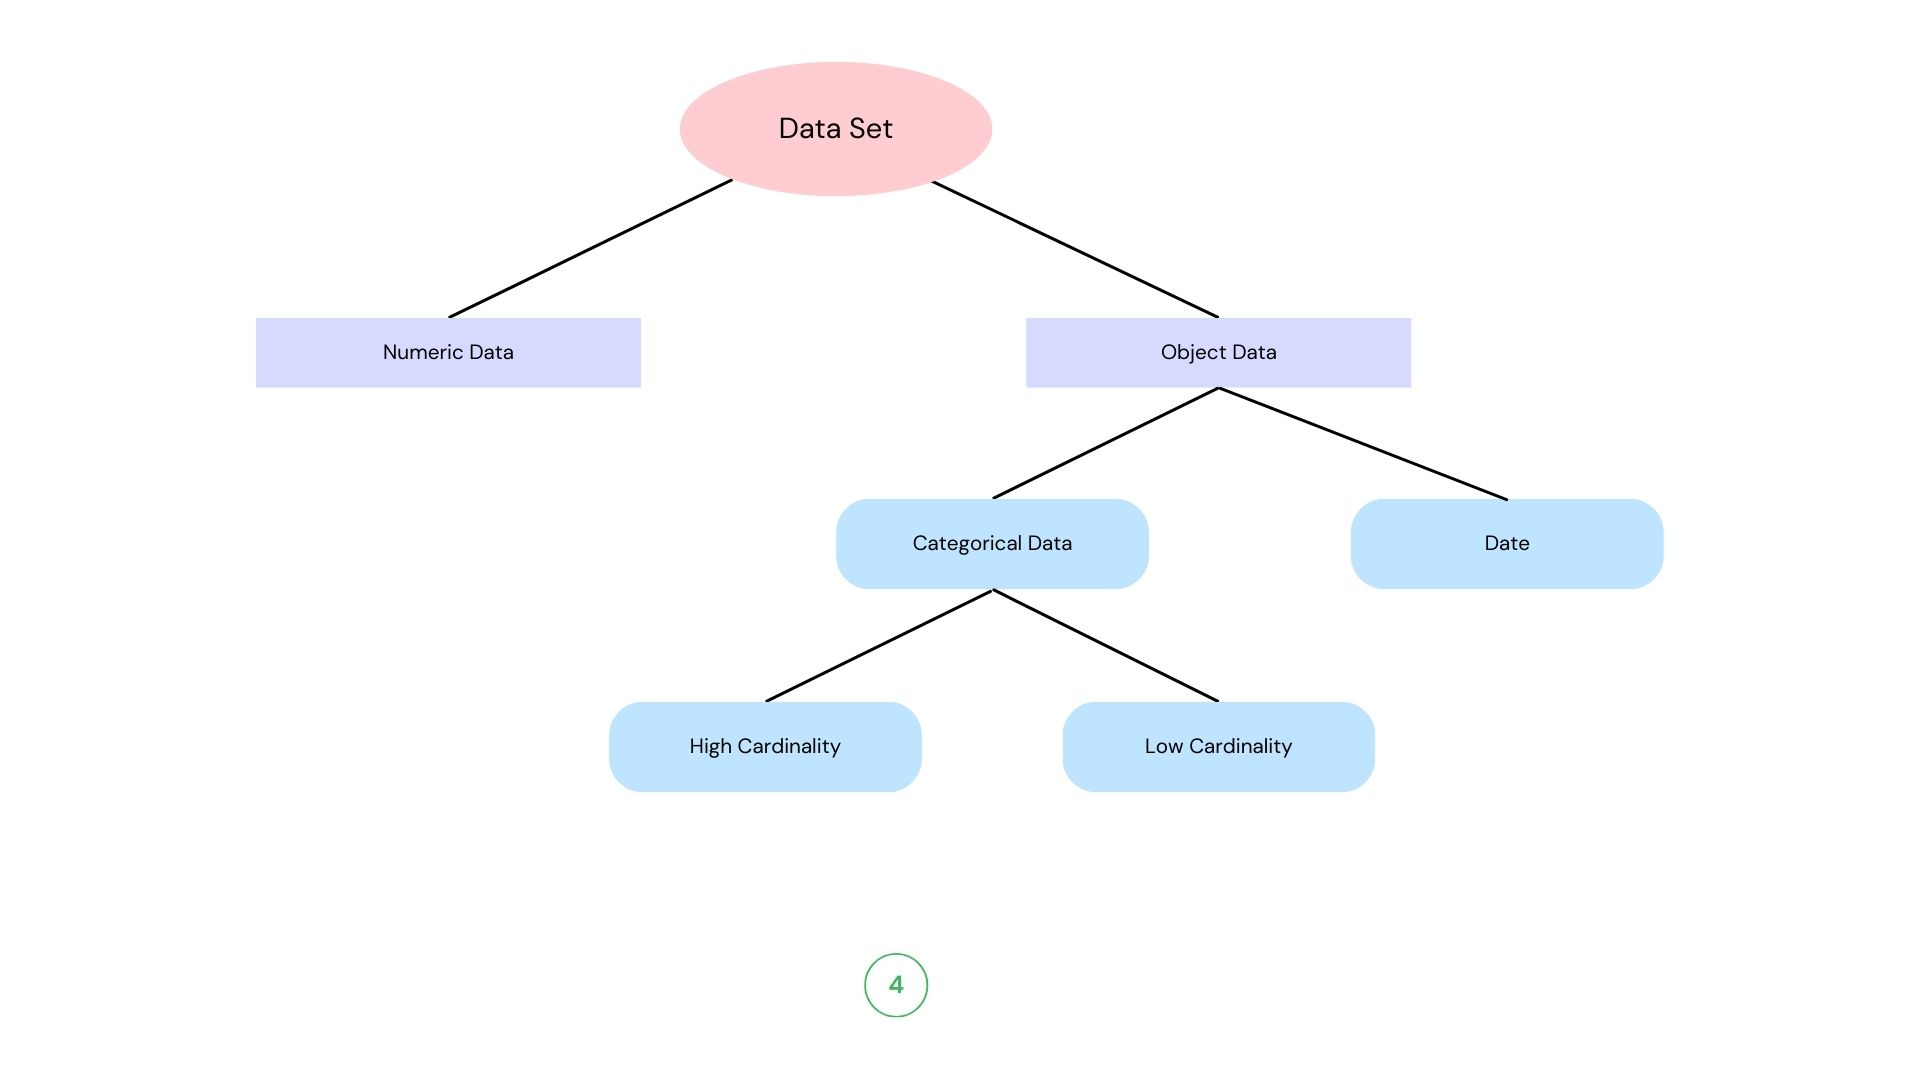

# MELBOURNE HOUSE PRICE MODEL
Our encode approach will be same like tree above. First of all, we need to split our data to 'Numeric' and 'Object' data. Object data need to be encode to train model. But object has Date column and its type is object, we'll convert it to 'datetime' and dealing with it seperatly. Rest of Date column, we'll have 'categorical data'. For high cardinality we'll use 'Ordinal Encoder', for low cardinality we'll use 'One Hot Encoder'.
Then, we'll train our model

In [2]:
# Reading data
data_set = pd.read_csv("melb_data.csv")

In [3]:
# First 5 row:
data_set.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
# see types
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
# collecting object type columns.
numeric_columns = data_set.select_dtypes(exclude="object")
object_columns = data_set.drop(numeric_columns, axis=1)

In [6]:
numeric_columns.info()
# We will use imputer to fill NaN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          13580 non-null  int64  
 1   Price          13580 non-null  float64
 2   Distance       13580 non-null  float64
 3   Postcode       13580 non-null  float64
 4   Bedroom2       13580 non-null  float64
 5   Bathroom       13580 non-null  float64
 6   Car            13518 non-null  float64
 7   Landsize       13580 non-null  float64
 8   BuildingArea   7130 non-null   float64
 9   YearBuilt      8205 non-null   float64
 10  Lattitude      13580 non-null  float64
 11  Longtitude     13580 non-null  float64
 12  Propertycount  13580 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.3 MB


In [7]:
object_columns.info()
# We will use encoder to encode object values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Suburb       13580 non-null  object
 1   Address      13580 non-null  object
 2   Type         13580 non-null  object
 3   Method       13580 non-null  object
 4   SellerG      13580 non-null  object
 5   Date         13580 non-null  object
 6   CouncilArea  12211 non-null  object
 7   Regionname   13580 non-null  object
dtypes: object(8)
memory usage: 848.9+ KB


In [8]:
# first of all we will encode date
import datetime as dt
object_columns["Date"] = pd.to_datetime(object_columns["Date"] )


C:\Users\PC\AppData\Local\Temp\ipykernel_13300\522173850.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  object_columns["Date"] = pd.to_datetime(object_columns["Date"] )


In [9]:
# divide to groups year-month-day
object_columns["Date_year"]= object_columns.Date.dt.year
object_columns["Date_month"]= object_columns.Date.dt.month
object_columns["Date_day"]= object_columns.Date.dt.day

In [10]:
# seeing first 5 row after dividing
object_columns.head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname,Date_year,Date_month,Date_day
0,Abbotsford,85 Turner St,h,S,Biggin,2016-03-12,Yarra,Northern Metropolitan,2016,3,12
1,Abbotsford,25 Bloomburg St,h,S,Biggin,2016-04-02,Yarra,Northern Metropolitan,2016,4,2
2,Abbotsford,5 Charles St,h,SP,Biggin,2017-04-03,Yarra,Northern Metropolitan,2017,4,3
3,Abbotsford,40 Federation La,h,PI,Biggin,2017-04-03,Yarra,Northern Metropolitan,2017,4,3
4,Abbotsford,55a Park St,h,VB,Nelson,2016-04-06,Yarra,Northern Metropolitan,2016,4,6


In [11]:
# Probobly, day of week and is weekday or weekend could be help to improve our model accuracy 
object_columns["Date_day_of_week"]= object_columns.Date.dt.day_of_week
object_columns["Date_is_weekdays"] = np.where(object_columns["Date_day_of_week"].isin([5,6]),0,1)

In [12]:
object_columns.head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname,Date_year,Date_month,Date_day,Date_day_of_week,Date_is_weekdays
0,Abbotsford,85 Turner St,h,S,Biggin,2016-03-12,Yarra,Northern Metropolitan,2016,3,12,5,0
1,Abbotsford,25 Bloomburg St,h,S,Biggin,2016-04-02,Yarra,Northern Metropolitan,2016,4,2,5,0
2,Abbotsford,5 Charles St,h,SP,Biggin,2017-04-03,Yarra,Northern Metropolitan,2017,4,3,0,1
3,Abbotsford,40 Federation La,h,PI,Biggin,2017-04-03,Yarra,Northern Metropolitan,2017,4,3,0,1
4,Abbotsford,55a Park St,h,VB,Nelson,2016-04-06,Yarra,Northern Metropolitan,2016,4,6,2,1


In [13]:
# now start to encode, but first we will measure cardinality
# diving two groups object columns
categorical_columns = object_columns.select_dtypes(include="object")
date_columns = object_columns.select_dtypes(include=["int32","int64"])

object_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Suburb            13580 non-null  object        
 1   Address           13580 non-null  object        
 2   Type              13580 non-null  object        
 3   Method            13580 non-null  object        
 4   SellerG           13580 non-null  object        
 5   Date              13580 non-null  datetime64[ns]
 6   CouncilArea       12211 non-null  object        
 7   Regionname        13580 non-null  object        
 8   Date_year         13580 non-null  int64         
 9   Date_month        13580 non-null  int64         
 10  Date_day          13580 non-null  int64         
 11  Date_day_of_week  13580 non-null  int64         
 12  Date_is_weekdays  13580 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(4), object(7)
memory usage: 1.3+ MB


In [14]:
# for low cardinality we'll collect columns if it has lower than 10 cardinality. Rest of it will be high cardinality
low_card= []
for col in categorical_columns.columns:
    print(f"Column name: {col}, Cardinality: {len(categorical_columns[col].unique())}")
    if len(categorical_columns[col].unique()) < 10:
        low_card.append(col)

Column name: Suburb, Cardinality: 314
Column name: Address, Cardinality: 13378
Column name: Type, Cardinality: 3
Column name: Method, Cardinality: 5
Column name: SellerG, Cardinality: 268
Column name: CouncilArea, Cardinality: 34
Column name: Regionname, Cardinality: 8


In [15]:
# dividing two dataframe 
low_cardinality_categorical_columns = categorical_columns[low_card]
high_cardinality_categorical_columns = categorical_columns.drop(low_card, axis=1)

In [16]:
low_cardinality_categorical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Type        13580 non-null  object
 1   Method      13580 non-null  object
 2   Regionname  13580 non-null  object
dtypes: object(3)
memory usage: 318.4+ KB


In [17]:
high_cardinality_categorical_columns.head()

,Suburb,Address,SellerG,CouncilArea
0,Abbotsford,85 Turner St,Biggin,Yarra
1,Abbotsford,25 Bloomburg St,Biggin,Yarra
2,Abbotsford,5 Charles St,Biggin,Yarra
3,Abbotsford,40 Federation La,Biggin,Yarra
4,Abbotsford,55a Park St,Nelson,Yarra


In [18]:
# encoding low cardinality columns
from sklearn.preprocessing import OneHotEncoder
oh_encoder = OneHotEncoder( handle_unknown="ignore", sparse= False)
encoded_low = pd.DataFrame(oh_encoder.fit_transform(
    low_cardinality_categorical_columns),columns=oh_encoder.get_feature_names_out(low_cardinality_categorical_columns.columns)
                          )

encoded_low.index = low_cardinality_categorical_columns.index

D:\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
encoded_low.head()

,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# encoding high cardinality columns
from sklearn.preprocessing import OrdinalEncoder
or_encoder = OrdinalEncoder()
encoded_high = pd.DataFrame(or_encoder.fit_transform(high_cardinality_categorical_columns))
encoded_high.columns = high_cardinality_categorical_columns.columns

In [21]:
encoded_high.head()

,Suburb,Address,SellerG,CouncilArea
0,0.0,12794.0,23.0,31.0
1,0.0,5943.0,23.0,31.0
2,0.0,9814.0,23.0,31.0
3,0.0,9004.0,23.0,31.0
4,0.0,10589.0,155.0,31.0


In [22]:
# merging columns
encoded_categorical = pd.concat([encoded_high,encoded_low],axis=1)
encoded_object = pd.concat([date_columns,encoded_categorical],axis=1)
encoded_data_set = pd.concat([numeric_columns,encoded_object],axis=1)

In [23]:
encoded_data_set.head(5)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Method_SP,Method_VB,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# to impute missing values:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
imputed_data_set = pd.DataFrame(imputer.fit_transform(encoded_data_set))
imputed_data_set.columns = encoded_data_set.columns

In [28]:
imputed_data_set.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Method_SP,Method_VB,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2.0,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3.0,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4.0,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# finally: make model to predict 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


X = imputed_data_set.drop(["Price"], axis=1)
y = imputed_data_set.Price
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [36]:
model_1 = RandomForestRegressor()
model_1.fit(X_train,y_train)
preds1 = model_1.predict(X_test)

print(mean_absolute_error(y_test,preds1),f" score {model_1.score(X_test,y_test)}")


170325.27326362298  score 0.7741455045382613
